In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import time, os, sys, gc

import h5py 

import svgutils.transform as sg 
import sys 

import matplotlib.patches as patches

from scipy.integrate import solve_ivp

import class_energy as energy
import class_equations_of_motion as eom 

import class_handle_input as h_in
import class_handle_wavefunctions as h_wavef

import class_visualization as vis
import class_mass_size as mass_size

In [2]:
def integrate_self_energy(V_0, tx, ty, B, E):
    E_self = lambda kx, ky: (2*V_0**2)/(4*np.pi**2)*(1-np.cos(kx)*np.cos(ky))/(B-E-2*tx*np.cos(kx)-2*ty*np.cos(ky))
    E_self_int = scipy.integrate.dblquad(E_self, -np.pi,np.pi, -np.pi,np.pi)
    return E_self_int

def find_Ep(V_0, tx, ty, B, E_guess):
    E_self_int = lambda E: E+integrate_self_energy(V_0, tx, ty, B, E-2*tx-2*ty)[0]
    E_min = scipy.optimize.fsolve(E_self_int, [E_guess])
    return E_min

def guess_Ep(V_0):
    return -0.004649*V_0**2-0.07471*V_0+0.8718

In [3]:
def quick_pot_scan(params, V_0_arr):
    print('\nPerturbative Calculations:')
    E_arr = np.zeros(len(V_0_arr), dtype=complex)
    for i in range(len(V_0_arr)):
        print('V0 =', V_0_arr[i])
        params["V_0"] = V_0_arr[i]

        eom_object = eom.eom(params=params)
        wavefunc_object = h_wavef.wavefunctions(params=params)
        wfn_manip = h_wavef.wavefunc_operations(params=params)
        ''' 
        Init wavefunction
        '''
        psi_init = wavefunc_object.create_init_wavefunction(params['init_choice'])
        psi_init = wfn_manip.reshape_one_dim(psi_init)
        ''' 
        Imaginary Time Propagation
        '''
        psi, E_evo, epsilon_evo = eom_object.solve_for_fixed_params_imag_time_prop_new(psi_init)
        E_arr[i] = E_evo[-1]
    
    return E_arr

def pert_pot_scan(params, V_0_arr):
    print('\nvGH Calculations:')
    E_arr = np.zeros(len(V_0_arr), dtype=complex)
    for i in range(len(V_0_arr)):
        print('V0 =', V_0_arr[i])
        E_min = find_Ep(V_0_arr[i], params["tx"], params["ty"], params["B"], guess_Ep(V_0_arr[i]))
        E_arr[i] = E_min[0]
    
    return E_arr

def get_Ep_from_E_vGH(E_vGH, tx, ty):
    return E_vGH+2*tx+2*ty

def get_E_from_Ep(E_vGH, tx, ty):
    return E_vGH-2*tx-2*ty

def get_energies(params,V_0_range):
    E_arr1 = np.zeros(len(V_0_range))

    Ep_pert = pert_pot_scan(params, V_0_range)
    E_vGH = quick_pot_scan(params, V_0_range)

    E_pert = get_E_from_Ep(Ep_pert, params["tx"], params["ty"])
    return E_pert, E_vGH

In [4]:
params = {"n": 256,
"M": 36,
"Mx": 16,
"Mx_display": 4,
"converge_new_lattice": "no",
"My": 16,
"My_display": 4,
"B": 1.0,
"tx": 100,
"ty": 100,
"V_0": 150.0,
"qx": 0,
"qy": 0,
"init_choice": "uniform",
"external_wf_tag": " ",
"excitation_no": 11,
"angle_pattern": [0,0,0,0],
"V_0_pattern": [0,0,0,0],
"n_states": 0,
"path_to_input_wavefunction": " ",
"dt": 0.001,
"tol": 1e-10}

x = (2*np.pi/params["n"])*np.arange(params["n"])

''' 
I/O Object
'''
h5_io_object = h_in.io_hdf5()

In [5]:
V_0_range = np.linspace(0,100,21)

params["tx"] = 100
params["ty"] = 100
t = params["tx"] + params["ty"]
E_pert1, E_vGH1 = get_energies(params,V_0_range)

params["tx"] = 50
params["ty"] = 150
E_pert2, E_vGH2 = get_energies(params,V_0_range)

params["tx"] = 10
params["ty"] = 190
E_pert3, E_vGH3 = get_energies(params,V_0_range)


vGH Calculations:
V0 = 0.0
V0 = 10.0
V0 = 20.0
V0 = 30.0
V0 = 40.0
V0 = 50.0
V0 = 60.0
V0 = 70.0
V0 = 80.0
V0 = 90.0
V0 = 100.0

Perturbative Calculations:
V0 = 0.0
V0 = 10.0
V0 = 20.0
V0 = 30.0
V0 = 40.0
V0 = 50.0
V0 = 60.0
V0 = 70.0
V0 = 80.0
V0 = 90.0
V0 = 100.0

vGH Calculations:
V0 = 0.0
V0 = 10.0
V0 = 20.0
V0 = 30.0
V0 = 40.0
V0 = 50.0
V0 = 60.0
V0 = 70.0
V0 = 80.0
V0 = 90.0
V0 = 100.0

Perturbative Calculations:
V0 = 0.0
V0 = 10.0
V0 = 20.0
V0 = 30.0
V0 = 40.0
V0 = 50.0
V0 = 60.0
V0 = 70.0
V0 = 80.0
V0 = 90.0
V0 = 100.0

vGH Calculations:
V0 = 0.0
V0 = 10.0
V0 = 20.0
V0 = 30.0
V0 = 40.0
V0 = 50.0
V0 = 60.0
V0 = 70.0
V0 = 80.0
V0 = 90.0
V0 = 100.0

Perturbative Calculations:
V0 = 0.0
V0 = 10.0
V0 = 20.0
V0 = 30.0
V0 = 40.0
V0 = 50.0
V0 = 60.0
V0 = 70.0
V0 = 80.0
V0 = 90.0
V0 = 100.0


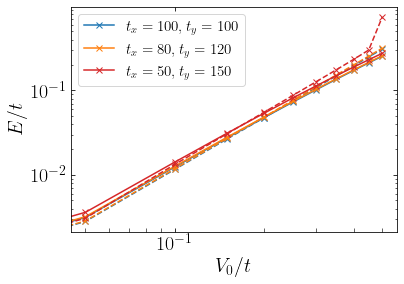

In [27]:
A = 6
plt.rc('figure', figsize=[46.82 * .5**(.5 * A), 33.11 * .5**(.5 * A)])
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
font_size = 20

fig, axs = plt.subplots()

plt.plot(V_0_range/t, -(E_pert1.real+2*t+0*100)/t, marker='x', color='tab:blue', linestyle='solid', label=r'$t_x = 100, t_y = 100$')
plt.plot(V_0_range/t, -(E_vGH1.real+2*t+0*100)/t, marker='x', color='tab:blue', linestyle='dashed')

plt.plot(V_0_range/t, -(E_pert2.real+2*t+0*80)/t, marker='x', color='tab:orange', linestyle='solid', label=r'$t_x = 80, t_y = 120$')
plt.plot(V_0_range/t, -(E_vGH2.real+2*t+0*80)/t, marker='x', color='tab:orange', linestyle='dashed')

plt.plot(V_0_range/t, -(E_pert3.real+2*t)/t, marker='x', color='tab:red', linestyle='solid', label=r'$t_x = 50, t_y = 150$')
plt.plot(V_0_range/t, -(E_vGH3.real+2*t)/t, marker='x', color='tab:red', linestyle='dashed')

plt.xlabel(r'$V_0/t$', fontsize=font_size)
plt.ylabel(r'$E/t$', fontsize=font_size)

plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)

axs.set_xscale('log', base=10)
axs.set_yscale('log', base=10)
#axs.set_yscale('log')

plt.legend(fontsize=15)

plt.tick_params(axis='x', direction='in', length=4, top=True)
plt.tick_params(axis='y', direction='in', length=4, right=True)
plt.tick_params(axis='x', which='minor', direction='in', length=4, right=True)

plt.tick_params(which='minor', axis='y', direction='in', right=True)

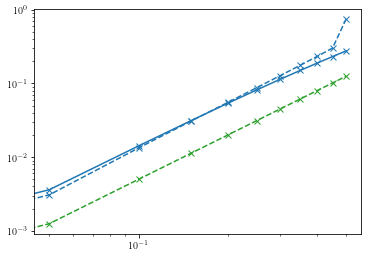

In [29]:
plt.plot(V_0_range/t, -(E_pert3.real+2*t)/t, marker='x', color='tab:blue', linestyle='solid', label=r'$t_x = 100, t_y = 100$')
plt.plot(V_0_range/t, -(E_vGH3.real+2*t)/t, marker='x', color='tab:blue', linestyle='dashed')
plt.plot(V_0_range/t, 0.5*(V_0_range/t)**2, marker='x', color='tab:green', linestyle='dashed')

plt.xscale('log')
plt.yscale('log')